# Plotting in Python with matplotlib
Shahryar Noei
Based on notebooks designed by Marco Chierici

Apr 1, 2025

# Common Jupyter notebook shortcuts

- Execute current cell (and advance to the next one): SHIFT + ENTER
- Execute current cell (and stay there): CTRL (CMD) + ENTER
- Create an empty code cell above the selected cell: ESC + A
- Create an empty code cell below the selected cell: ESC + B
- Delete selected cell: ESC + DD (not a typo: two times D)
- Copy selected cell: ESC + C
- Paste selected cell below: ESC + V
- Change selected cell type from code to text (markdown): ESC + M
- Change selected cell type from text to code: ESC + Y

# Kick off

To load matplotlib, we use the following import convention:

In [1]:
import matplotlib
import matplotlib.pyplot as plt

Since we are in a Jupyter notebook, we also execute the following statement to output plots directly in the Jupyter notebook:

In [2]:
%matplotlib inline

We also load the Python numerical library (NumPy: Numerical Python) and Pandas with their import convention:

In [3]:
import numpy as np
import pandas as pd

# Intro

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Great control of every element in a figure, including figure size and DPI
* High-quality output in many formats, including PNG, PDF, SVG, EPS
* Support for $\LaTeX$ formatted labels and texts
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

## Example

Let's start right away and create our first plot!

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

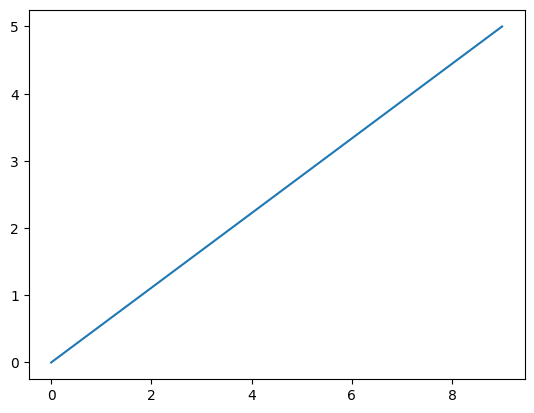

In [5]:
plt.plot(x)

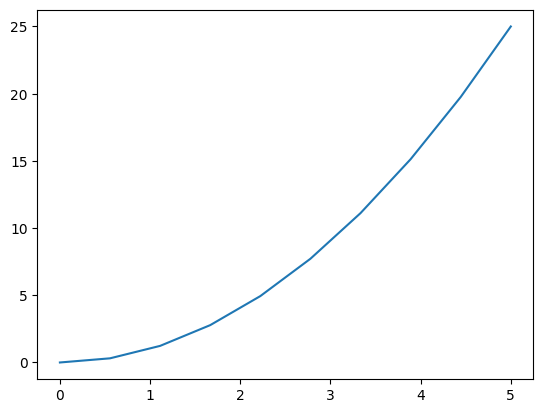

In [6]:
plt.plot(x, y)

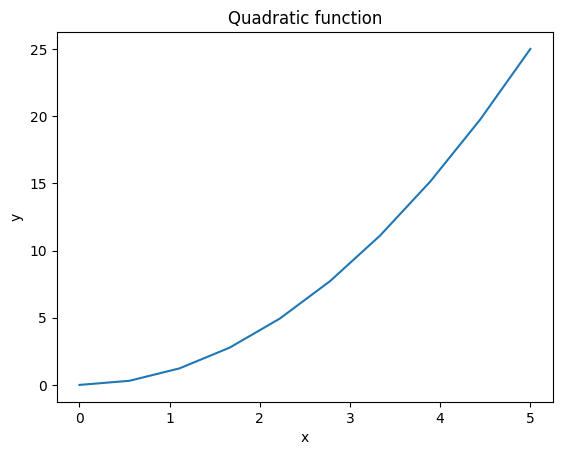

In [7]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic function")
plt.show()

## Compatible data types

Matplotlib can deal with NumPy arrays (as just shown), base Python lists, and Pandas Series and Dataframes.

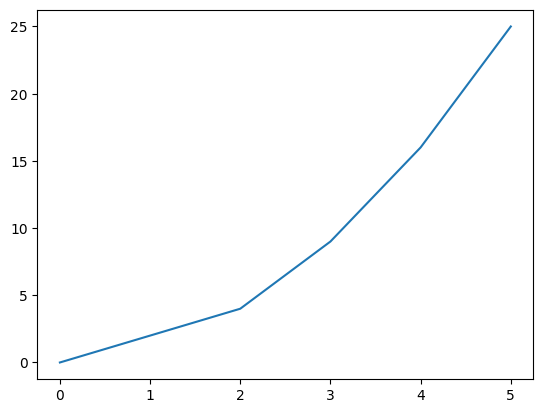

In [8]:
xdata = [0, 1, 2, 3, 4, 5]
ydata = [0, 2, 4, 9, 16, 25]
plt.plot(ydata)

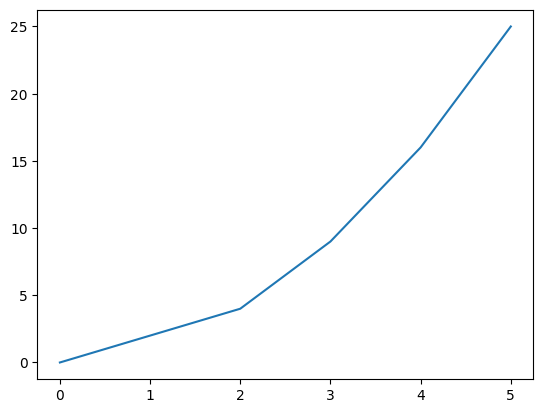

In [9]:
plt.plot(np.array(ydata))

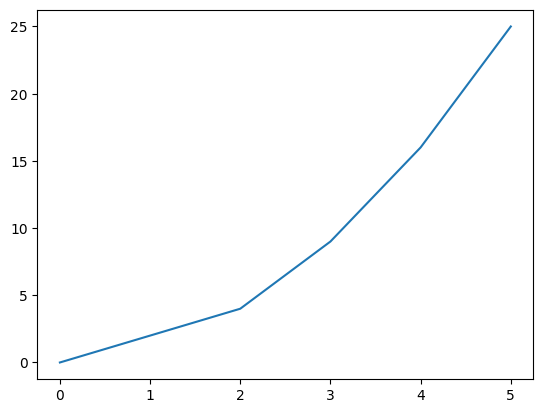

In [10]:
plt.plot(pd.Series(ydata))

In [11]:
df = pd.DataFrame({"x": xdata, "y": ydata})
df.head()

,x,y
0,0,0
1,1,2
2,2,4
3,3,9
4,4,16


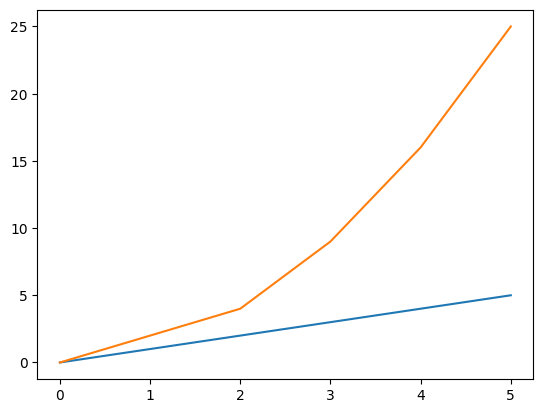

In [12]:
plt.plot(df) # each df's columns is plotted as a separate line and df index is the x-axis values

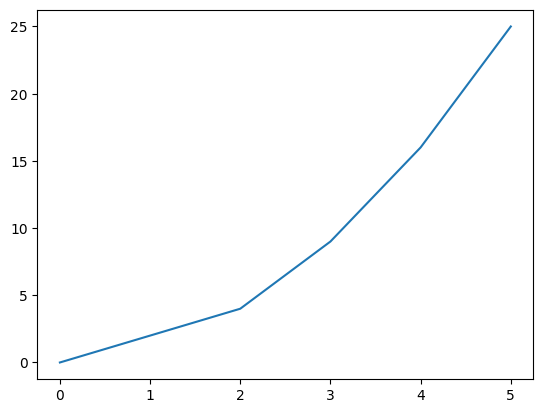

In [13]:
plt.plot(df["y"])

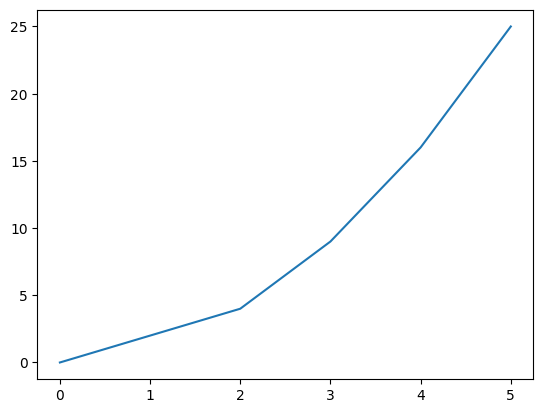

In [14]:
plt.plot(df.index, df["y"])

## Two interfaces at the price of one

### MATLAB-like

At the top of the matplotlib hierarchy is the "state-machine environment" which is provided by the `matplotlib.pyplot` module. This is also called the **MATLAB-like interface**. 

In the examples above, we used this kind of interface. At this level, most of the plotting related elements (lines, images, text, etc.) are handled by the `pyplot` module.

This interface is usually the easiest way to get started with plotting using matplotlib. It is designed to be compatible with [MATLAB](https://it.mathworks.com/products/matlab.html)'s plotting functions, so it is easier to get started with if you are familiar with MATLAB.

It also has a minumum of coding overhead for simple plots.

### Object-oriented

The next level down in the matplotlib hierarchy is the object-oriented (OO) interface.

The main idea with OO programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like interface). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot - more about that later.

At this level, the user creates figures with `pyplot`, and through those figures, one or more "axes" objects can be created. These axes objects are then used for most plotting actions.

## Figures and subplots

Everything in matplotlib lives within a `Figure` object.

The figure keeps track of all the child Axes, a group of special "Artists" (titles, figure legends, etc), nested subfigures, and the canvas. 

A figure can have any number of Axes (at least one, to be useful).

You can think of the figure object as a canvas that holds all the subplots and other plot elements inside it.

### Parts of a figure

https://matplotlib.org/stable/_images/anatomy.png

The easiest way to create a new figure is with `plt.figure`:

In [15]:
fig = plt.figure()  # an empty figure with no axes

<Figure size 640x480 with 0 Axes>

We use now the OO interface: instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance using the `add_axes` method:

In [16]:
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0-1)

Then, we add a plot to the `axes` object, and customize x-y axis labels and plot title:

In [17]:
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Quadratic function')

Text(0.5, 1.0, 'Quadratic function')

Unfortunately, inside Jupter notebooks the plots are reset after evaluating each cell, so we have to put all of the above commands in the same cell to see the result!

Text(0.5, 1.0, 'Quadratic function')

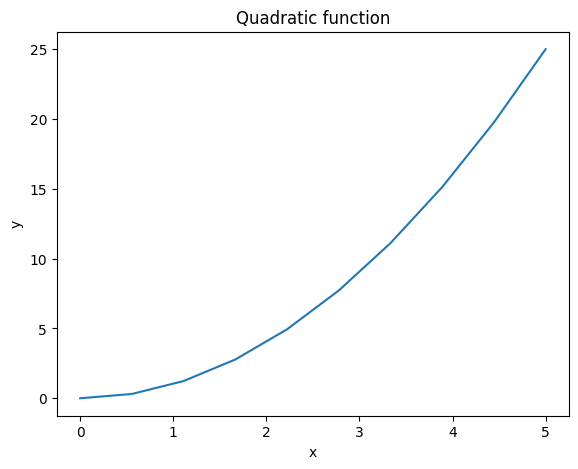

In [18]:
fig = plt.figure()  # an empty figure with no axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0-1)

axes.plot(x, y)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Quadratic function')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

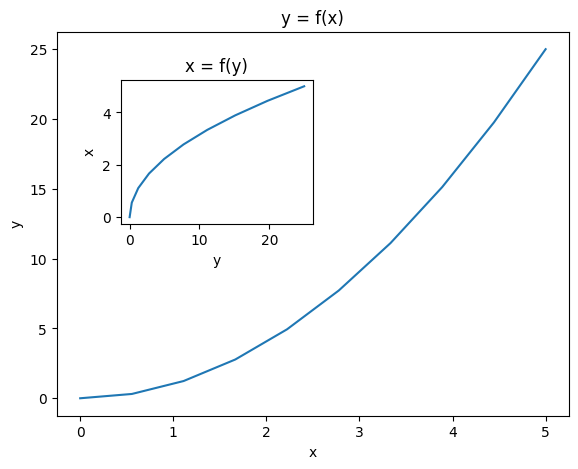

In [19]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('y = f(x)')

# inset
axes2.plot(y, x)
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('x = f(y)');

If we don't care about specifying where the plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

Text(0.5, 0.98, 'Figure title')

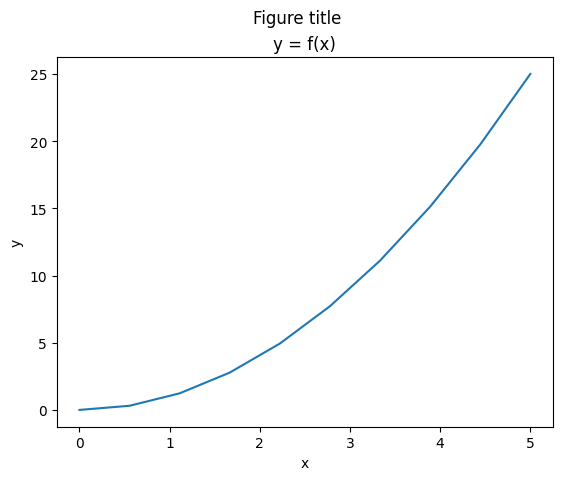

In [20]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y = f(x)') # this is the axis title
fig.suptitle("Figure title") # this is the figure title

Alternatively, we can create one or more subplots with `add_subplot(nrows, ncols, subplot_id)`: more on this later.

Text(0.5, 1.0, 'x = f(y)')

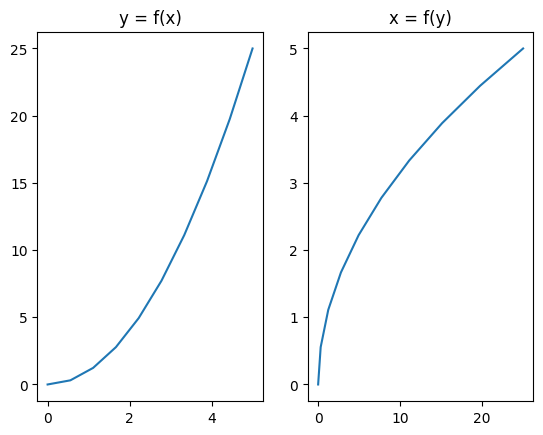

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, y)
ax1.set_title("y = f(x)")

ax2.plot(y, x)
ax2.set_title("x = f(y)")

##  Axes

A figure can have one or more subplots inside it called Axes, arranged in rows and columns. Every figure has at least one Axes. Don't confuse Axes with X and Y axis: they are different!

The Axes objects, such as `ax1` and `ax2` above, are what you think of as 'a plot'. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The **Axes** contains two (or three in the case of 3D) **Axis** objects (be aware of the difference between Axes and Axis!!) which take care of the data limits (the data limits can also be controlled via `set_xlim()` and `set_ylim()` Axes methods). 

Each Axes has:

1. a title (set via `set_title()`);
1. a x-label (set via `set_xlabel()`);
1. a y-label (set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the object-oriented programming (OOP) interface.

## Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

## Artist

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

---

## Simple scatterplot

We have already seen what `plt.plot()` creates if we you call it on an arbitrary sequence of numbers:

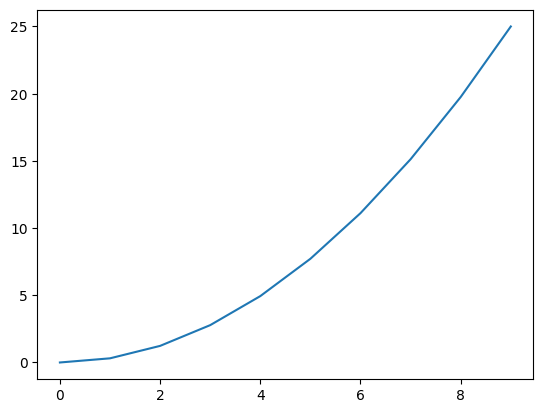

In [22]:
plt.plot(y)

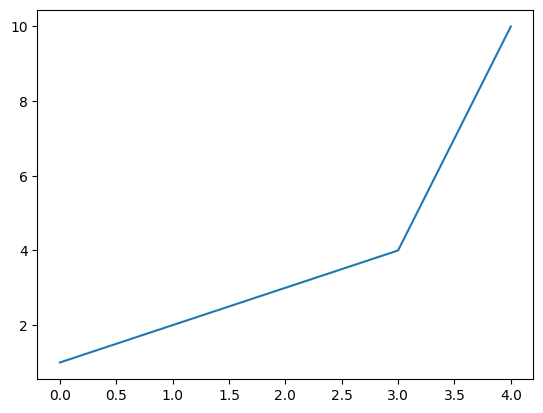

In [23]:
plt.plot([1, 2, 3, 4, 10])

Matplotlib draws a **line chart** automatically, assuming the values of the X-axis start from zero, going up to as many items in the data.

Notice the line `matplotlib.lines.Line2D` in the above code output?

That's because Matplotlib returns the plot object itself besides drawing the plot.

If you only want to see the plot (e.g. in a non-interactive script), add `plt.show()` at the end and execute all the lines in one shot.

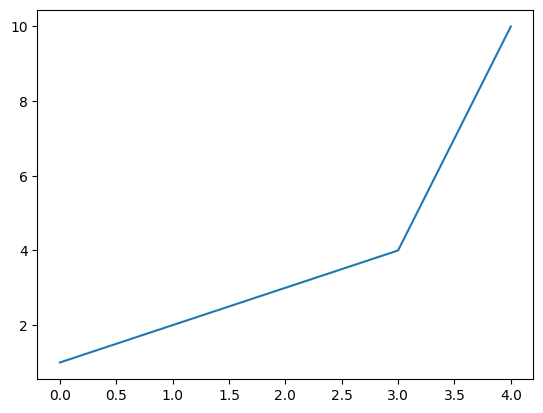

In [24]:
plt.plot([1, 2, 3, 4, 10])
plt.show()

Another possibility is to end the `plt.plot()` command with a semicolon:

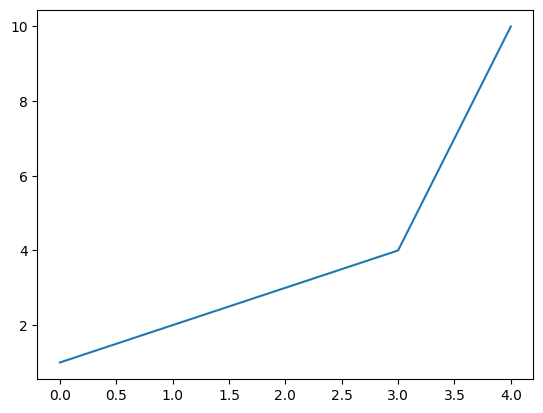

In [25]:
plt.plot([1, 2, 3, 4, 10]);

So, this is not a scatterplot yet, but a line chart. How to draw a real scatterplot?

Let's first focus a bit more about what arguments `plt.plot()` expects.

The three basic arguments are: `plt.plot(x, y, format)` (in this specific order!)

The `format` is a string representing a shorthand combination of `[marker][line][color]`.

Each of them is optional: if not provided, the value from the style cycle is used. Exception: if `line` is given, but no `marker`, the data will be a line without markers.

Commonly used markers are:

- `'.'` (point)
- `'o'` (circle)
- `'*'` (star)
- `'D'` (diamond)

Line styles are:

- `'-'` (solid)
- `'--'` (dashed)
- `'-.'` (dash-dot)
- `':'` (dotted)

Colors are single-letter abbreviations of color names, such as:

- `'b'` (blue)
- `'g'` (green)
- `'r'` (red)
- `'k'` (black)

**Example:** The format `'o-r'` has 3 characters standing for: *red circles with solid line*.
By omitting the `line` part, you will be left with red circles (`‘or’`).

Note that:

1. `format` is not necessarily a 3-character string, since some `line` styles may take up 2 characters (e.g. `'--'`, `'-.'`).
2. you can provide the combination in any order (e.g. `[color][marker][line]`), but the parsing may be ambiguous.

Few commonly used short hand format examples are:

- `'*--r'` : red stars with dashed lines
- `'s:k'` : black squares with dotted line ('k' = black)
- `'D-.b'` : blue diamonds with dash-dot line

For a complete list of colors, markers and linestyles, check out the `help(plt.plot)` command (also [online](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)).

---

### Exercise

Using the Matlab-like interface:

1. Draw a scatterplot using green circles and no lines
2. On the same scatterplot, add a different set of points, rendered as blue stars. Hint: just call `plt.plot()` again.
3. Add the basic plot features: title, legend, x & y axis labels. Hint: `plt.legend([label1, label2, ...])`

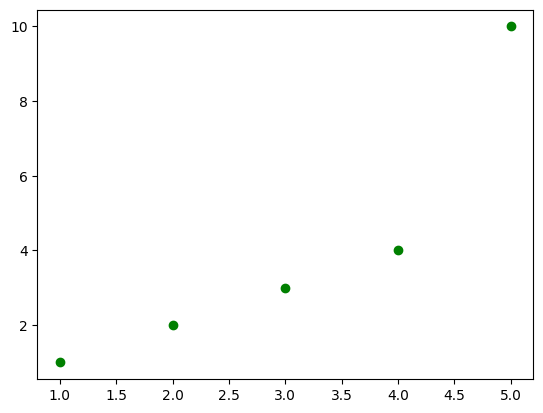

In [26]:
# 1.
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 10]

plt.plot(x, y, 'og')
plt.show()

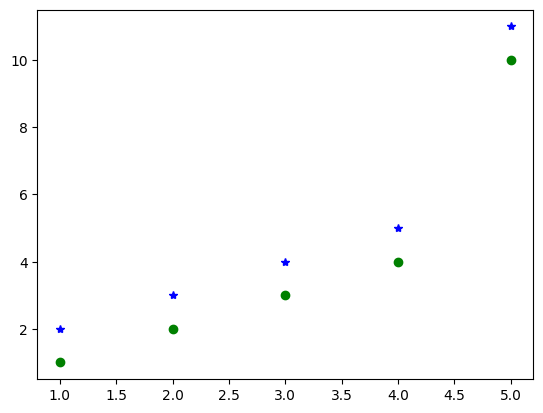

In [27]:
# 2. Draw two sets of points
xx = np.array([1, 2, 3, 4, 5])
yy = np.array([1, 2, 3, 4, 10])
plt.plot(xx, yy, "og")  # green dots
plt.plot(xx, yy+1, "*b")  # blue stars
plt.show()

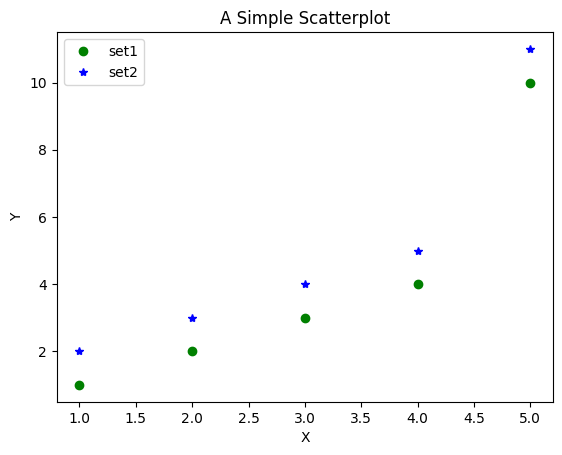

In [28]:
# 3. (legend method 1)
plt.plot(xx, yy, "og")
plt.plot(xx, yy+1, "*b")

plt.title("A Simple Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["set1", "set2"])
plt.show()

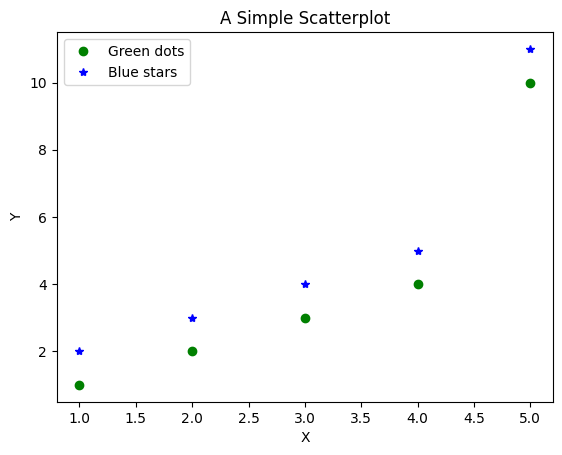

In [29]:
# 3. legend method 2
plt.plot(xx, yy, "og", label="Green dots") # we attach a label to be used by the legend
plt.plot(xx, yy+1, "*b", label="Blue stars")

plt.title("A Simple Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")  # legend text comes from the plot's label parameter
plt.show()

# other choices for loc are: 'upper right', 'lower right', 'center', 'right', 'center right' (similarly for left)

---

How to increase the size of the figure?

The easy way to do it is by setting the `figsize` inside `plt.figure()` method. We also set the x-y axis limits.

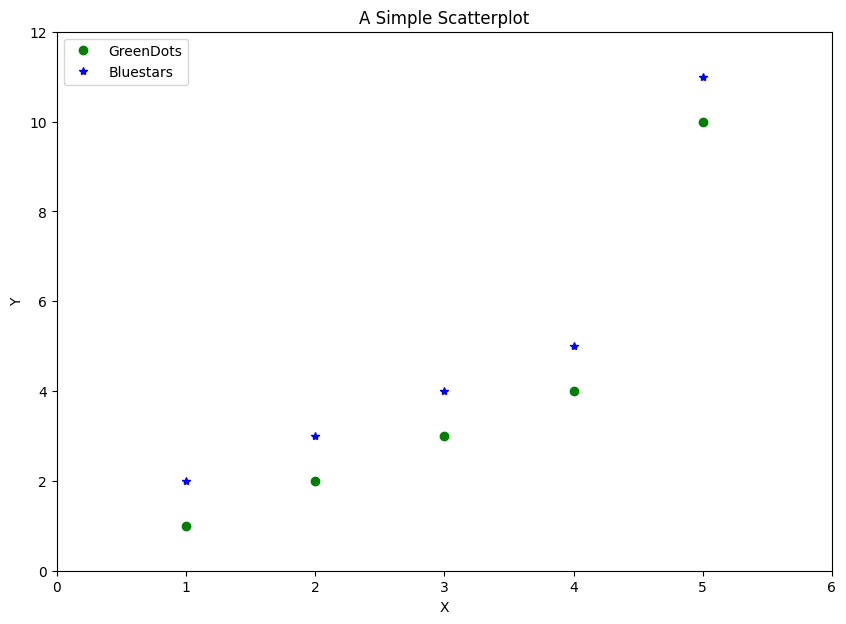

In [30]:
plt.figure(figsize=(10, 7))  # (width, height)

plt.plot(xx, yy, "og", label="GreenDots")  # green dots
plt.plot(xx, yy+1, "*b", label="Bluestars")  # blue stars

plt.xlim(0, 6) # x axis limits
plt.ylim(0, 12) # y axis limits

plt.title("A Simple Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.show()

## How to draw 2 scatterplots in different panels

Let's understand figure and axes in little more detail.

Suppose I want to draw our two sets of points (green rounds and blue stars) in two separate plots side-by-side instead of the same plot. 

You can do that by creating two separate subplots, or Axes, using `plt.subplots(1, 2)`: this means to creates 1 row with 2 subplots. The command returns two objects:

1. the figure
1. the axes (subplots) inside the figure

https://www.machinelearningplus.com/wp-content/uploads/2019/01/99_matplotlib_structure-1.png

Previously, I called `plt.plot()` to draw the points. Since there was only one axes by default, it drew the points on that axes itself.

But now, since you want the points drawn on different subplots (axes), you have to call the plot function **on the respective axes**.

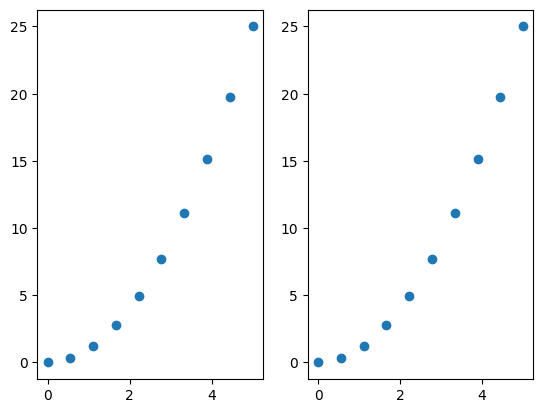

In [31]:
# Create Figure and Subplots, capturing them in separate variables
x = np.linspace(0, 5, 10)
y = x ** 2

fig, axes = plt.subplots(1, 2)

ax1 = axes[0]
ax2 = axes[1]

# Plot
ax1.plot(x, y, 'o')
ax2.plot(x, y, 'o')

plt.show()

The above code seems quite repetitive and can be further optimized:

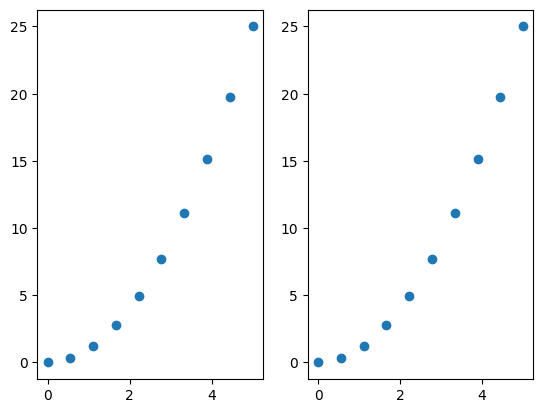

In [32]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, 'o')

plt.show()

Let's add titles and x-y labels:

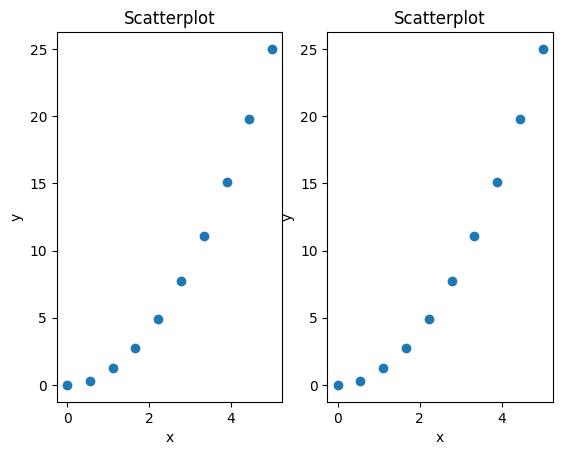

In [33]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

plt.show()

Quite good, but figure axes and labels overlap: we fix this with the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

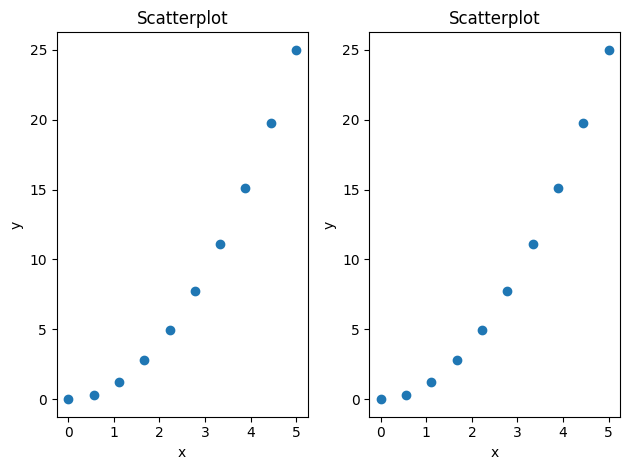

In [34]:
fig, axes = plt.subplots(1, 2)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

fig.tight_layout()
plt.show()

Better, but we notice that the y-axis labels of the right-hand panel are redundant: in the following example, we create two Axes sharing the y axis.

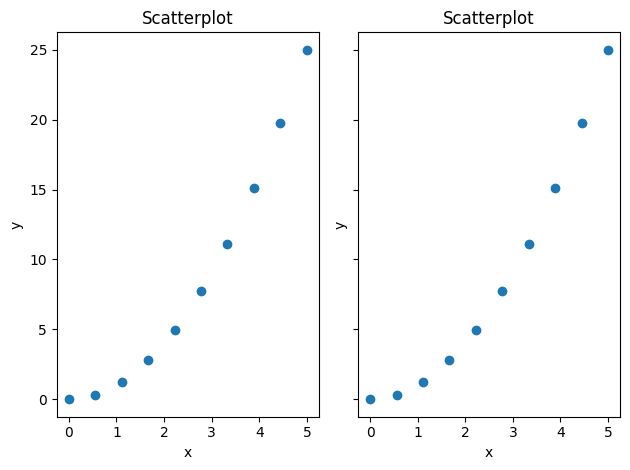

In [35]:
fig, axes = plt.subplots(1, 2, sharey=True)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Scatterplot")

fig.tight_layout()
plt.show()

Thats sounds like a lot of functions to learn! It's actually quite easy to remember them.

The `ax1` and `ax2` objects, like `plt`, have equivalent `set_title`, `set_xlabel` and `set_ylabel` functions. In fact, `plt.title()` actually calls the current axes `set_title()` to do the job.

* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

Alternately, to save keystrokes, you can set multiple things in one go using the `ax.set()`:

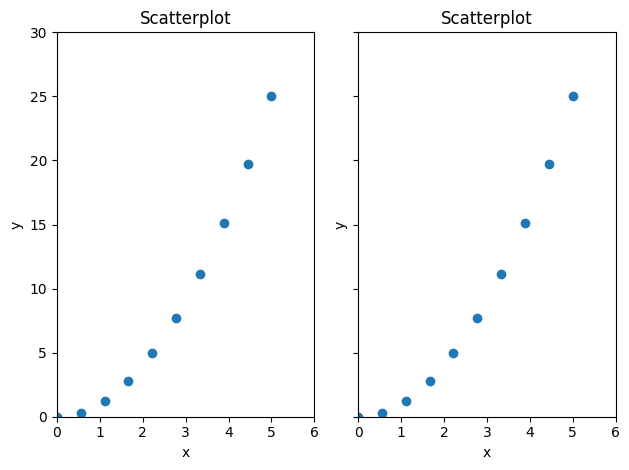

In [36]:
fig, axes = plt.subplots(1, 2, sharey=True)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set(title="Scatterplot", xlabel="x", ylabel="y", 
           xlim=(0, 6), ylim=(0, 30))

fig.tight_layout()
plt.show()

## Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:

In [37]:
fig = plt.figure(figsize=(8, 4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

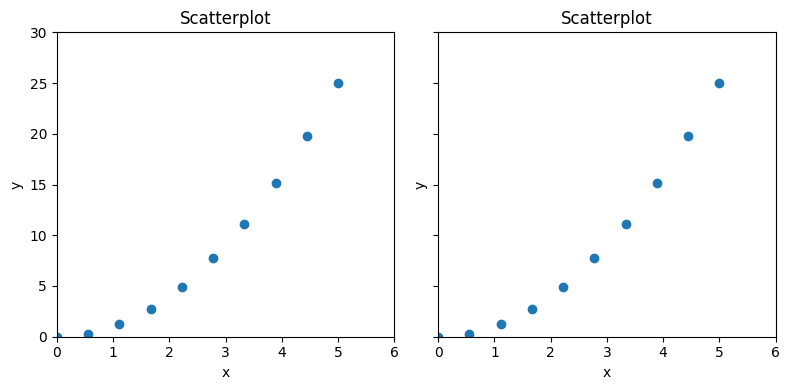

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4), dpi=100)

for ax in axes:
    ax.plot(x, y, 'o')
    ax.set(title="Scatterplot", xlabel="x", ylabel="y", 
           xlim=(0, 6), ylim=(0, 30))

fig.tight_layout()
plt.show()

## Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [39]:
fig.savefig("filename.png")

In this case, the image format is inferred from the filename extension. Available formats include PNG, JPG, EPS, SVG, PDF.

You can also specify the DPI and explicitly set an output format: note that, if you do specify a format, then the literal filename is used, regardless of its extension (it's up to you to check its consistency with the format).

In [40]:
fig.savefig("filename.png", dpi=200, format="png")

Here is a complete example:

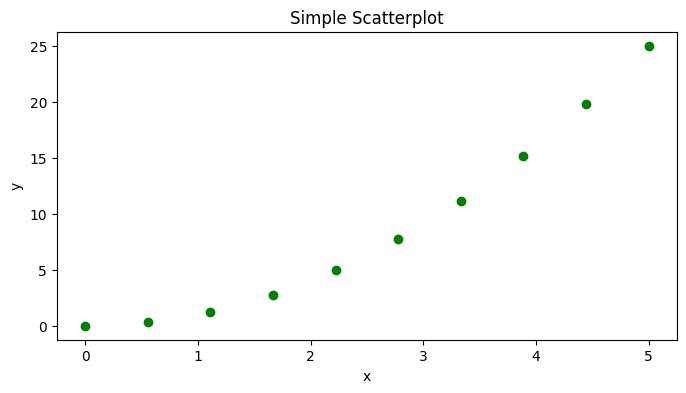

In [41]:
fig = plt.figure(figsize=(8, 4), dpi=100)
plt.plot(x, y, 'og')
plt.title("Simple Scatterplot")
plt.xlabel("x")
plt.ylabel("y")
fig.savefig("simple_scatterplot.png")
plt.show()

## More on Object-Oriented Syntax vs Matlab-like Syntax

A potentially confusing feature of Matplotlib is that it has two coding interfaces:

* Matlab-like syntax (state-based)
* Object-oriented (OO) syntax (more powerful).

This is partly the reason why matplotlib doesn't have one consistent way of achieving the same given output, making it a bit difficult to understand for newcomers.

So far we have seen both interfaces in action, with a bit more focus on the OO syntax, which is more intuitive and pythonic to work with.

However, since the original purpose of matplotlib was to recreate the plotting facilities of Matlab in Python, the Matlab-like syntax is retained and still works.

The Matlab syntax is state-based, or "stateful".
That means that `plt` keeps track of what the current axes is. So whatever you draw with `plt.{anything}` will be reflected only on the **current** subplot.

In practice, the main difference between the two interfaces is:

* Matlab - all plotting is done using `plt` methods
* OO - all plotting is done using the respective axes methods.

So, the general procedure for the Matlab interface is:

* You manually create one subplot at a time (using `plt.subplot()` or `plt.add_subplot()`) and 
* immediately call `plt.plot()` or `plt.{anything}` to modify that specific subplot (axes). 

Whatever method you call using `plt` will be drawn in the current axes.

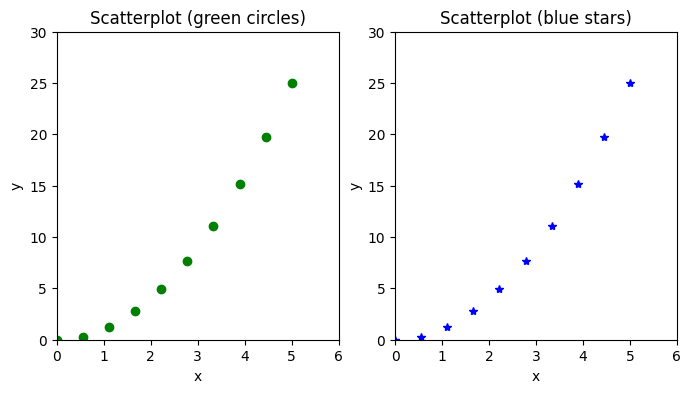

In [42]:
plt.figure(figsize=(8, 4), dpi=100)

# left hand subplot
plt.subplot(1, 2, 1) # (nRows, nColumns, axes number to plot)
plt.plot(x, y, "og")
plt.title("Scatterplot (green circles)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 6)
plt.ylim(0, 30)

# right hand subplot
plt.subplot(1, 2, 2)
plt.plot(x, y, "*b")
plt.title("Scatterplot (blue stars)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 6)
plt.ylim(0, 30)

plt.show()

Let’s breakdown the above piece of code.

In `plt.subplot(1,2,1)`, the first two values (1,2) specify the number of rows (1) and columns (2), and the third value (1) specifies the position of the current subplot. The subsequent `plt` functions will always draw on this current subplot.

You can get a reference to the current (subplot) axes with `plt.gca()` ("get current axis") and the current figure with `plt.gcf()` ("get current figure"). Likewise, `plt.cla()` and `plt.clf()` will clear the current axes and figure respectively.

This stateful interface may be quick and convenient for simpler plots. However, we realize it can lead to problems: for example, once the second panel is created, how can we add something back to the first?

The OO interface might look a but confusing because it has a mix of both `ax` and `plt` commands. However, there is a significant advantage with **the OO approach**, as it **provides more clear control over customization**.

Since `plt.subplots` returns all the axes as separate objects, you can avoid writing repetitive code by looping through the axes, like we did in one of the examples above.

Remember: `plt.plot()` or `plt.{anything}` will always act on the plot in the *current* axes, whereas `ax.{anything}` will modify the plot inside that specific `ax`.

In the following example, we'll draw multiple plots using for-loops with OO syntax: the target is to have a figure with 4 panels arranged in a 2x2 matrix. The panels will share both X and Y axis.

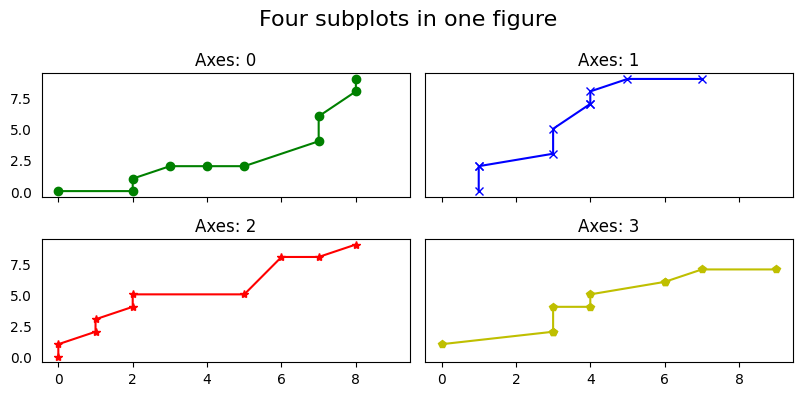

In [43]:
np.random.seed(100)

# create Figure and Subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4), dpi=100,
                         sharex=True, sharey=True)

# define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# plot each axes
for i, ax in enumerate(axes.ravel()): # I use ravel() to obtain a 1D array from a 2x2 matrix
    # generate random data
    xvals = sorted(np.random.randint(0, 10, 10))
    yvals = sorted(np.random.randint(0, 10, 10))
    
    ax.plot(xvals, yvals, marker=markers[i], color=colors[i])  
    ax.set_title(f'Axes: {i}')
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four subplots in one figure', fontsize=16)    
plt.tight_layout()
plt.show()

Things to notice:

1. you can specify marker type, color, and line through dedicated arguments within `plot()`, instead of using the `fmt` string
1. Y axis ticks were switched off with `ax.yaxis.set_ticks_position("none")`

Another advantage of the OO interface is the possibility to set a dynamic title for each subplot.

You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

`plt.suptitle()` adds a main title at figure level.
(`plt.title()` would have done the same for the current subplot)

---

### Exercise

Rewrite the code of the previous exercise using the OO syntax.

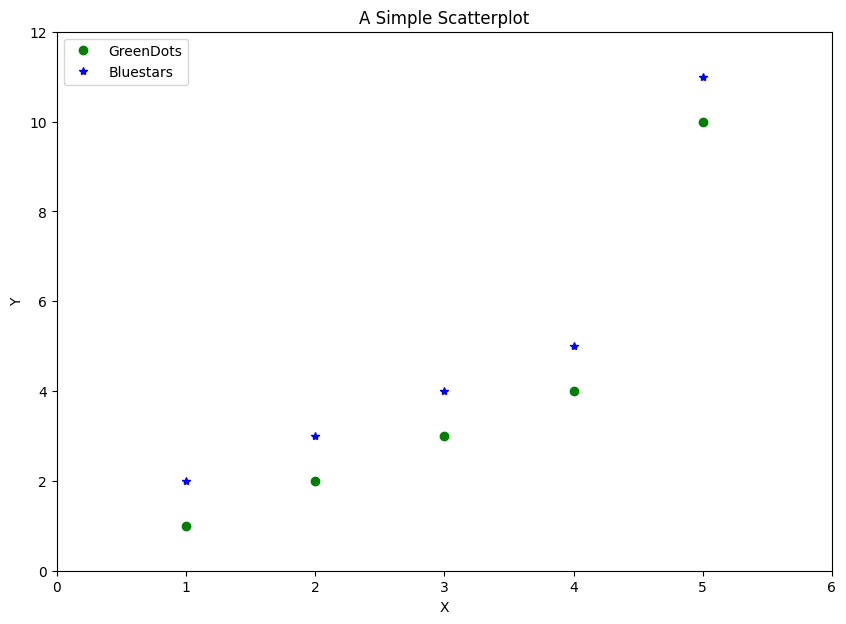

In [44]:
xx = np.array([1, 2, 3, 4, 5])
yy = np.array([1, 2, 3, 4, 10])

fig, ax = plt.subplots(figsize=(10, 7))  # (width, height)

ax.plot(xx, yy, "og", label="GreenDots")  # green dots
ax.plot(xx, yy+1, "*b", label="Bluestars")  # blue stars

ax.set_xlim(0, 6) # x axis limits
ax.set_ylim(0, 12) # y axis limits

ax.set_title("A Simple Scatterplot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

---

## Another take on scatterplots

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots: for example, the `scatter` method.

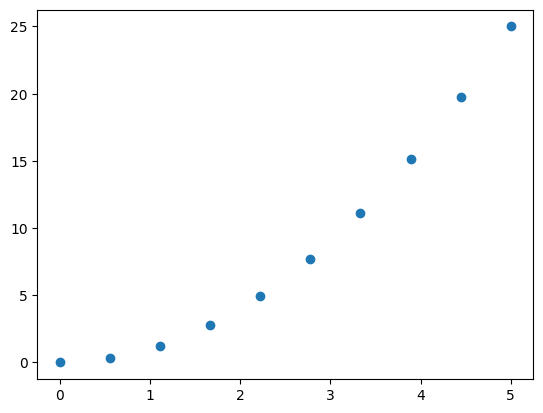

In [45]:
fig, ax = plt.subplots()
ax.scatter(x, x**2)
plt.show()

How is this different from a scatterplot drawn with `plot`?

The difference is `plt.plot()` does not provide options to change the color and size of point dynamically (based on another array). 
`plt.scatter()` allows you to do that.

By varying the size and color of points, you can create (for example) nice looking bubble plots.

Another convenience is that you can directly use a Pandas dataframe to set the x and y values, provided you specify the source dataframe in the `data` argument.

You can also set the color 'c' and size 's' of the points from one of the dataframe columns itself.

In [46]:
import pandas as pd

midwest = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv"
)
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


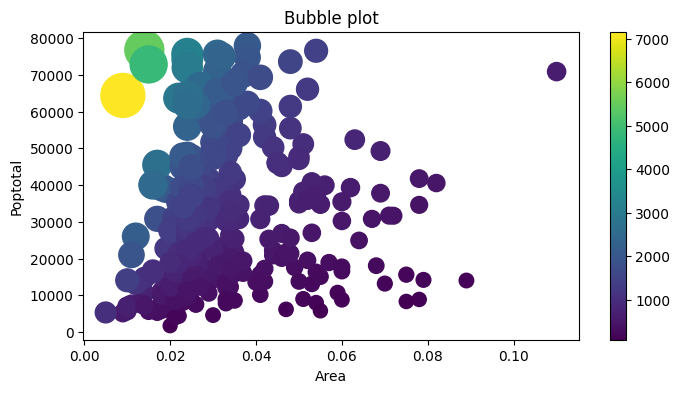

In [47]:
# Scatterplot with varying size and color of points
fig = plt.figure(figsize=(8, 4))

plt.scatter("area", "poptotal", data=midwest, s="dot_size", c="popdensity")
plt.title("Bubble plot")
plt.xlabel("Area")
plt.ylabel("Poptotal")
plt.colorbar()
plt.show()

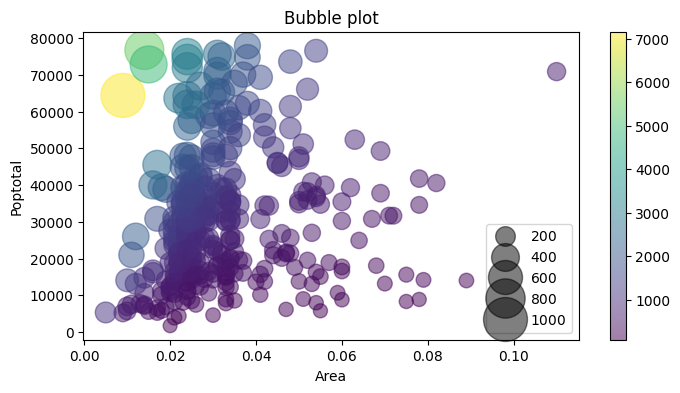

In [48]:
# Add a bit of transparency and a legend for the point sizes
fig = plt.figure(figsize=(8, 4))

pl = plt.scatter("area", "poptotal", data=midwest, 
                 s="dot_size", 
                 c="popdensity",
                 alpha=.5)
plt.title("Bubble plot")
plt.xlabel("Area")
plt.ylabel("Poptotal")
plt.colorbar()
plt.legend(*pl.legend_elements("sizes", num=5), loc="best")
plt.show()

# More on labels and legends

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object, or the `plt.legend()` function, and pass a list/tuple of legend texts for the previously defined curves:

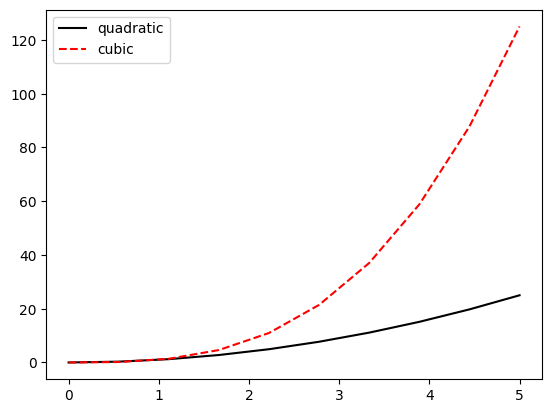

In [49]:
x = np.linspace(0, 5, 10)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, x**2, color="black")
ax.plot(x, x**3, color="red", linestyle="dashed")
ax.legend(["quadratic", "cubic"])
plt.show()

This method is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

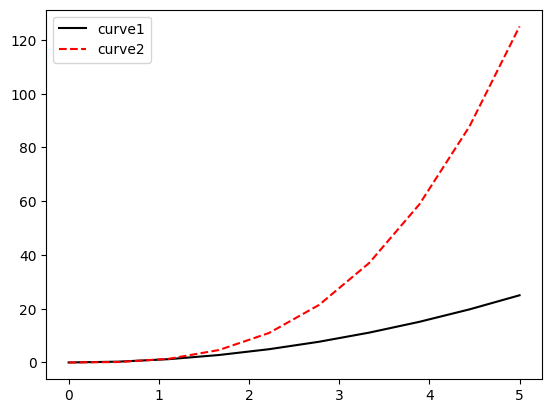

In [50]:
fig, ax = plt.subplots()

ax.plot(x, x**2, color="black", label="curve1")
ax.plot(x, x**3, color="red", linestyle="dashed", label="curve2")
ax.legend()
plt.show()

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes or strings for the various places the legend can be drawn. 

References:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend
- https://matplotlib.org/stable/users/explain/axes/legend_guide.html#legend-location

Some of the most common `loc` values are:

```
ax.legend(loc=0) # (default) let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. and more
```

The following figure is a more complete example with title, axis labels and default colors:

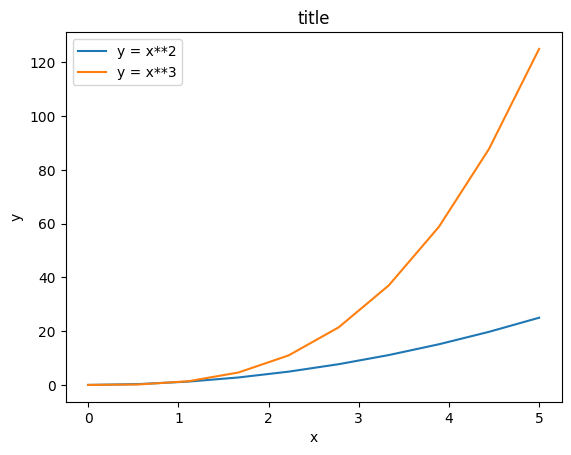

In [51]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2) # or loc='upper left'
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

plt.show()

# Formatting: LaTeX, rcParams, plot styles

## LaTeX
Matplotlib has great support for LaTeX. All we need to do is to use dollar signs to encapsulate LaTeX equations in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`.

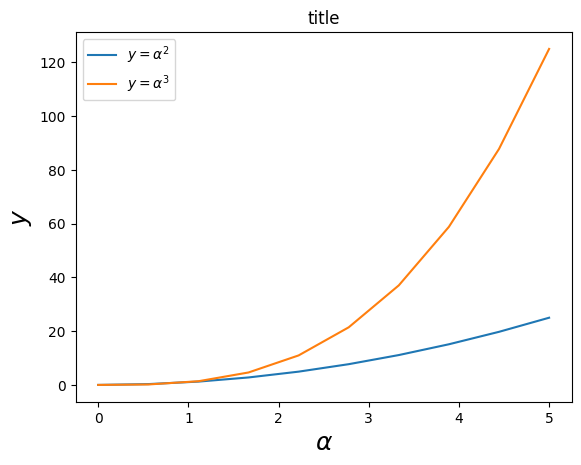

In [52]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')

plt.show()

## rcParams

The look and feel of various components of a matplotlib plot can be set globally using *rcParams*. 

The complete list of rcParams is very exhaustive: see the [help page](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) for the full list and explanation.
You can also view it by typing:

In [53]:
import matplotlib as mpl

```
mpl.rc_params()

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          ...
          'font.family': ['sans-serif'],
          'font.size': 10.0,
          'font.style': 'normal',
          ...
```

There are two methods for adjusting params: one is **permanent** (until you reset them to the default values) and one is **context-dependent**.

To change the params permanently at runtime, you can use `mpl.rcParams.update()`, passing a dictionary with key-value pairs.

For example, this snippet adjusts the font by setting it to ['stix'](https://www.stixfonts.org/) (Scientific and Technical Information Exchange project), which looks great on plots.

In [54]:
new_params = {'font.size': 18, 
              'font.family': 'STIXGeneral', 
              'mathtext.fontset': 'stix'}
mpl.rcParams.update(new_params)

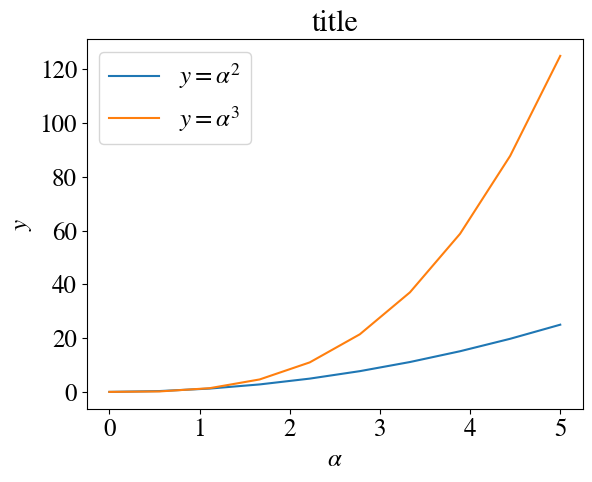

In [55]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')

plt.show()

The modification is permanent until you reset rcParams to their default settings:

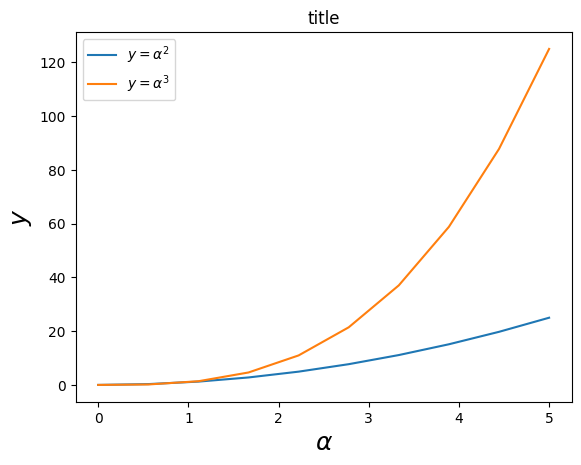

In [56]:
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')

plt.show()

If you only need to apply the modifications to just a few lines of code, then the context-dependent solution may be better:

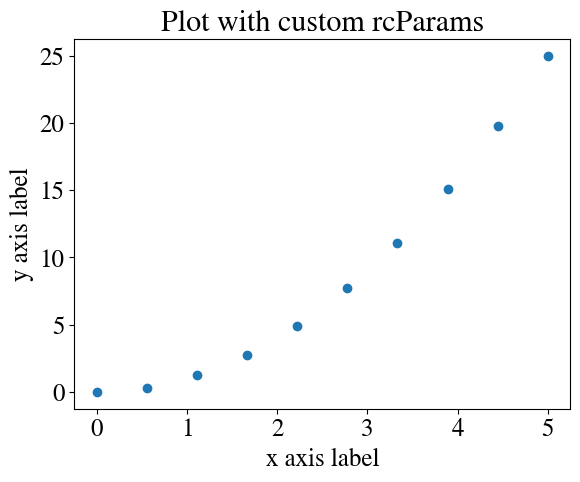

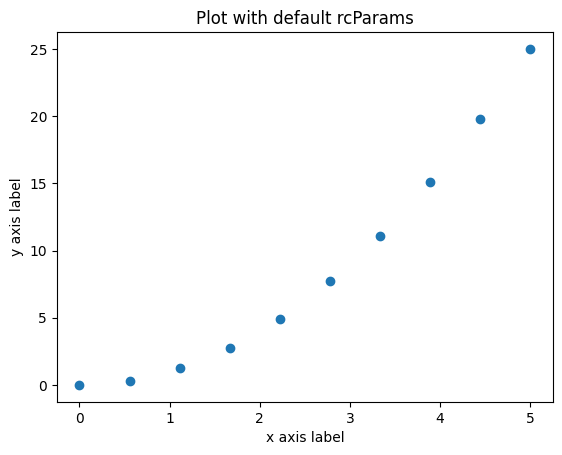

In [57]:
# a plot with modified params
with mpl.rc_context(new_params):
    plt.figure()
    plt.plot(x, y, 'o')
    plt.title("Plot with custom rcParams")
    plt.xlabel("x axis label")
    plt.ylabel("y axis label")
    plt.show()

# a plot with default params
# note: no need to reset rcParams here!
plt.figure()
plt.plot(x, y, 'o')
plt.title("Plot with default rcParams")
plt.xlabel("x axis label")
plt.ylabel("y axis label")
plt.show()

### Plot styles

Matplotlib comes with **pre-built styles** that you can browse by typing:

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Notice `fivethirtyeight`, and `ggplot`.

`seaborn` is called after another high-level plotting library that is especially useful if your input is in a Pandas dataframe. Note however that the seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn.

As we have seen above for `rcParams`, you can either use a style everywhere:

```
plt.style.use('ggplot')
...
...
...
plt.style.use('default')
```

or use it only within a code block:

```
with plt.style.context('ggplot'):
    plt.figure()
    plt.scatter(x, y)
    ...
```

To experiment with different styles, we'll write a function that takes a style name as input and produces a plot with sine (`np.sin()`) and cosine (`np.cos()`) waves.

In [59]:
# our custom function
def plot_sine_cosine_wave(style="ggplot"):
    # reset the graphical params (just in case)
    mpl.rcParams.update(mpl.rcParamsDefault)
    # use the selected style
    plt.style.use(style)
    
    # 100 linearly spaced values from 0 to 360 degrees (2pi radians)
    X = np.linspace(0, 2 * np.pi, 100)

    # create a plot and add sine and cosine waves
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.plot(X, np.sin(X))
    ax.plot(X, np.cos(X))
    # set proper x and y axis labels and a title showing the theme name    
    ax.set(xlabel="x (radians)", ylabel="y", title=style)
    plt.show()
    
    # before exiting, reset the graphical params
    mpl.rcParams.update(mpl.rcParamsDefault)

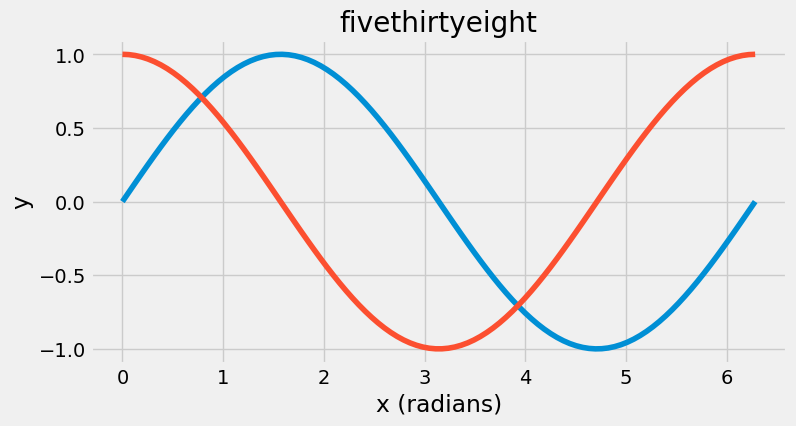

In [60]:
plot_sine_cosine_wave("fivethirtyeight")

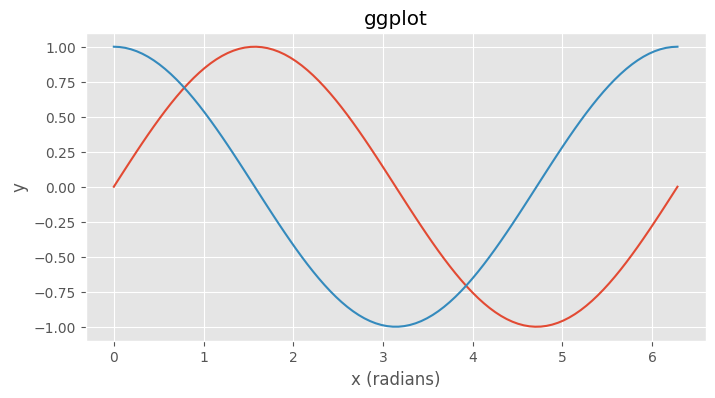

In [61]:
plot_sine_cosine_wave("ggplot")

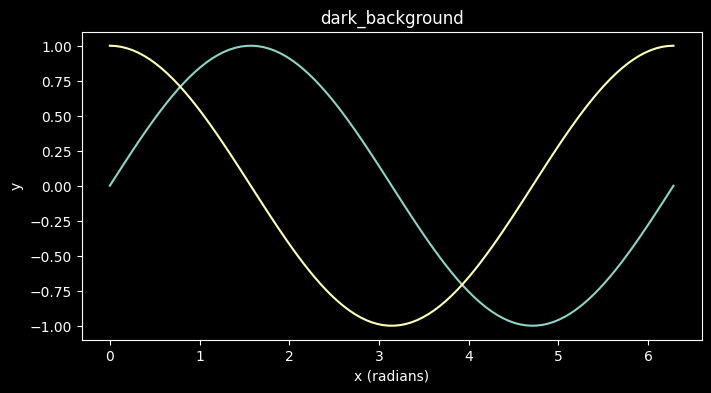

In [62]:
plot_sine_cosine_wave("dark_background")

---

# Recap exercise

Basic plotting:
1. Using the Matlab-like interface, create a simple line plot of the function $y=x^3$ for x ranging from -10 to 10.
1. Add axis labels and a title.

Scatterplots:
1. With the OO interface, create a figure with two subplots, arranged horizontally.
1. In subplot 1, draw a scatterplot of 20 random data points (hint: `np.random.rand`).
1. In subplot 2, plot another scatterplot of 20 different random data points, this time changing colors and marker styles.
1. Add distinct labels, titles, and legends for each subplot.

Plot style:
1. Change the global plot style by adjusting rcParams to change at least two plot properties.
1. Plot one of the scatterplots of the previous task with the updated style and see the difference.
---

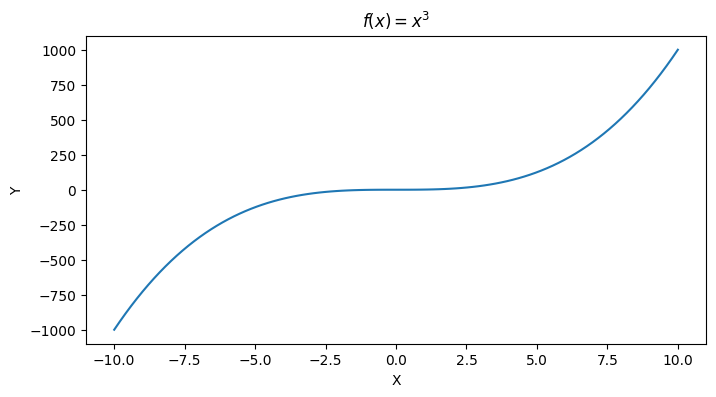

In [63]:
# basic plotting
mpl.rcParams.update(mpl.rcParamsDefault)
plt.subplots(figsize=(8,4))

x = np.linspace(-10,10,100)

plt.plot(x, x**3)

plt.xlabel("X")
plt.ylabel("Y")
plt.title(r"$f(x) = x^3$")

plt.show()

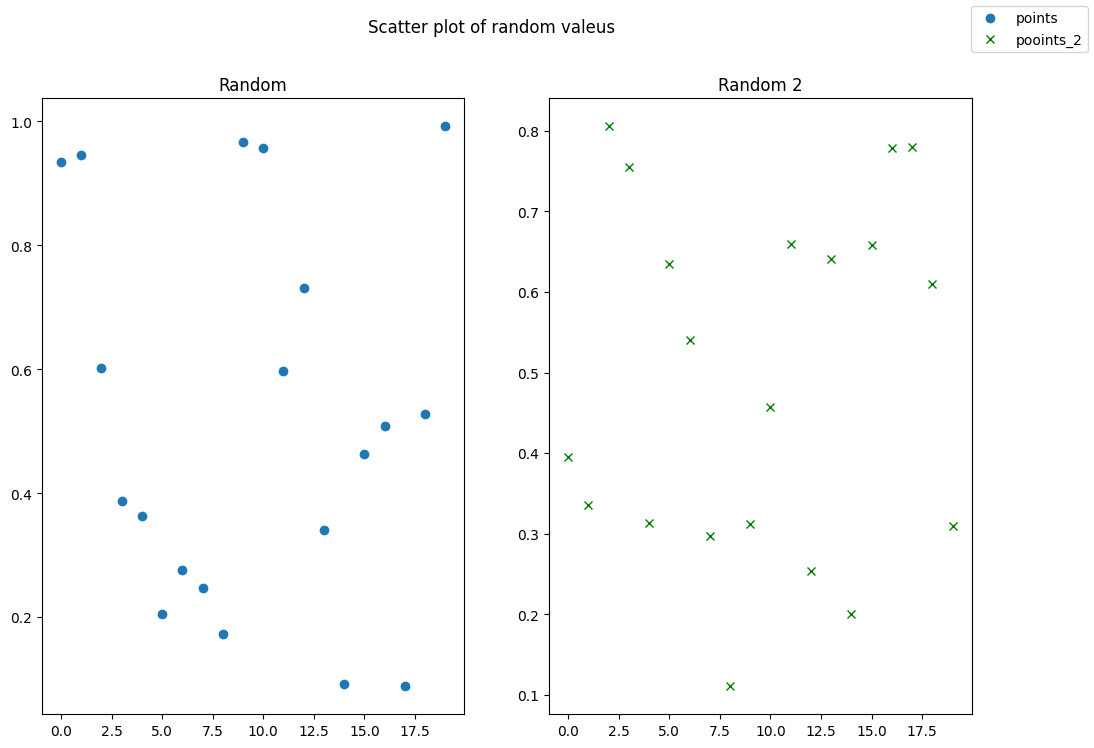

In [64]:
# scatterplot
fig, ax = plt.subplots(1,2, figsize=(12,8))

rand_x = np.random.rand(20)
rand_x_2 = np.random.rand(20)

ax[0].plot(rand_x, 'o', label="points")
ax[0].set_title("Random")

ax[1].plot(rand_x_2, 'gx', label="pooints_2")
ax[1].set_title("Random 2")

fig.suptitle("Scatter plot of random valeus")
fig.legend()

plt.show()

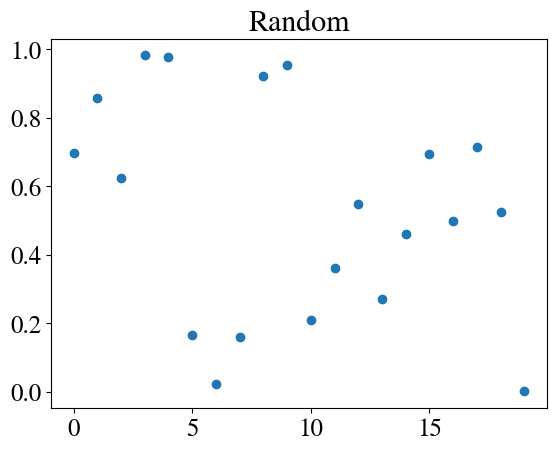

In [65]:
# plot style
new_params = {'font.size': 18, 
              'font.family': 'STIXGeneral'
             }

mpl.rcParams.update(new_params)

fig, ax = plt.subplots()

rand_x = np.random.rand(20)

ax.plot(rand_x, 'o', label="points")
ax.set_title("Random")

plt.show()

# Credits

Partially abridged from matplotlib.org, Machine Learning Plus, J.R. Johansson (CC-BY 3.0).